In [117]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt

# 1. Load data

## 1.1 Load data from old model

In [118]:
path_old_model = "../../ra-hannes/war-destruction/artemisa-results/hostomel-irpin-kharkiv-livoberezhnyi-moschun-rubizhne-volnovakha-aleppo-damascus-daraa-deirezzor-hama-homs-idlib-raqqa_"
directories_old_model = [path_old_model + str(i) for i in range(1,9)]

In [133]:
def get_dataframe(folders):
    for i, folder in enumerate(folders):
        try:        
            df_new = pd.read_csv(folders[i] + '/results.csv')
            df_new["run"] = i+1
            if i == 0:
                df = df_new
            else:
                df = pd.concat([df, df_new])
        except FileNotFoundError:
            print(f"File in folder {i+1} not found!")
            continue
    col_ids = ["_test_auc" in column for column in df.columns]
    column_names = df.columns[col_ids].values

    df['average AUC'] = df[column_names].mean(axis=1)
    df['standard deviation AUC'] = df[column_names].std(axis=1)
    
    return df, column_names

In [134]:
df_old_model, old_test_auc_cols = get_dataframe(directories_old_model)

File in folder 5 not found!


In [121]:
df_old_model = df_old_model[old_test_auc_cols[(old_test_auc_cols != "kharkiv_test_auc") & (old_test_auc_cols != "damascus_test_auc")]]
df_old_model['standard deviation AUC'] = df_old_model.std(axis=1)
df_old_model['average AUC'] = df_old_model[df_old_model.columns[df_old_model.columns != "standard deviation AUC"]].mean(axis=1)

## 1.2 Load performance table from new model

In [122]:
overview = pd.read_csv("../experiment_overview.csv")

In [123]:
string_dict_array = overview.iloc[1:]["per_city_test_aurocs"].values

In [124]:
list_of_dicts_ast = []
for string_dict in string_dict_array:
    try:
        parsed_dict = ast.literal_eval(string_dict)
        list_of_dicts_ast.append(parsed_dict)
    except (ValueError, SyntaxError) as e:
        print(f"Error evaluating string literal: {string_dict}")
        print(e)
        # Handle error
        list_of_dicts_ast.append({})

In [125]:
df_new_model = pd.DataFrame(list_of_dicts_ast)

In [126]:
df_new_model_cities = df_new_model.columns
df_new_model['standard deviation AUC'] = df_new_model.std(axis=1)
df_new_model['average AUC'] = df_new_model[df_new_model.columns[df_new_model.columns != "standard deviation AUC"]].mean(axis=1)

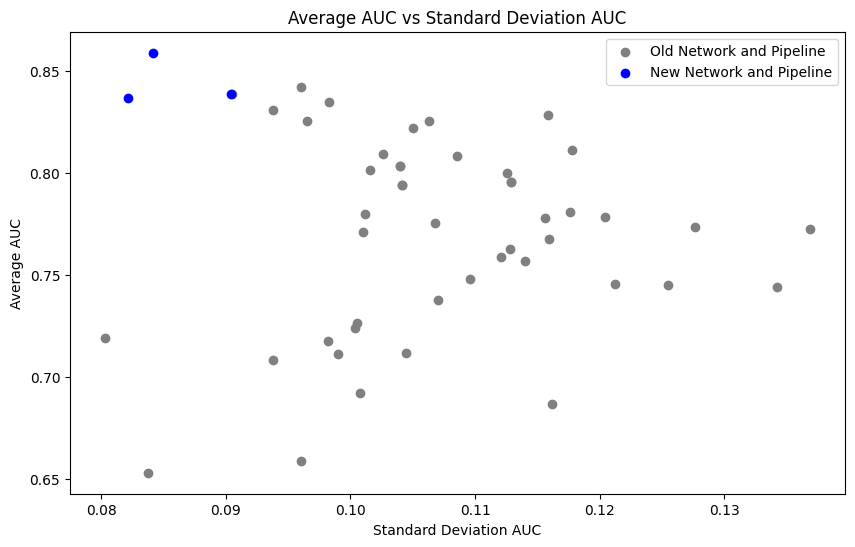

In [127]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot the other category
plt.scatter(df_old_model['standard deviation AUC'], df_old_model['average AUC'], color="grey", label='Old Network and Pipeline')

plt.scatter(df_new_model['standard deviation AUC'], df_new_model['average AUC'], color="blue", label='New Network and Pipeline')

# Adding labels and title
plt.xlabel('Standard Deviation AUC')
plt.ylabel('Average AUC')
plt.title('Average AUC vs Standard Deviation AUC')

# Add a legend
plt.legend(loc='best')

# Show the plot
#plt.savefig("../figures/runs.png")
plt.show()

In [128]:
df_new_model

,hostomel,irpin,livoberezhnyi,moschun,rubizhne,volnovakha,aleppo,daraa,deirezzor,hama,homs,idlib,raqqa,standard deviation AUC,average AUC
0,0.868950,0.901597,0.898121,0.876901,0.939682,0.863503,0.872776,0.848067,0.823431,0.776448,0.803737,0.789454,0.612122,0.082135,0.836522
1,0.888019,0.918388,0.913222,0.937384,0.959297,0.891700,0.876932,0.865317,0.835745,0.793845,0.847724,0.808598,0.629501,0.084196,0.858898
2,0.881592,0.905238,0.862895,0.910423,0.960469,0.884034,0.882090,0.863505,0.739842,0.775986,0.840913,0.781948,0.615377,0.090453,0.838793


In [ ]:
max_old_model = df_old_model.loc[df_old_model["average AUC"] == df_old_model["average AUC"].max()]

,hostomel_test_auc,irpin_test_auc,livoberezhnyi_test_auc,moschun_test_auc,rubizhne_test_auc,volnovakha_test_auc,aleppo_test_auc,daraa_test_auc,deirezzor_test_auc,hama_test_auc,homs_test_auc,idlib_test_auc,raqqa_test_auc,standard deviation AUC,average AUC
9,0.9442,0.9029,0.9222,0.9362,0.8971,0.7663,0.9451,0.8313,0.8295,0.8538,0.7645,0.7072,0.6493,0.095993,0.842277


In [151]:
df_old_model_best = df_old_model.loc[df_old_model["hostomel_test_auc"]==0.9442, old_test_auc_cols].reset_index(drop=True)

In [ ]:
df_old_model_best.columns =  [col.split("_")[0] for col in df_old_model_best.columns]

In [156]:
df_new_model_best = df_new_model.iloc[[1]]

In [165]:
df_new_model_best = df_new_model_best.drop(columns=["standard deviation AUC", "average AUC"])

In [166]:
summary_both = pd.concat([df_new_model_best, df_old_model_best], ignore_index=True, sort=False).T

In [167]:
summary_both.columns = ["new model", "old model"]